<a href="https://colab.research.google.com/github/vinaybist/NLP/blob/main/Copy_of_Project_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# IU M.S. Project Assignment

Name: **Vinay Bist**

Date: 04/24/2021

## Import & download required libraries
Corpus Used : **Amazon Fine Food Reviews**

In [ ]:
import numpy as np
import nltk
import pandas as pd
import seaborn as sns
from string import punctuation
from nltk import word_tokenize     
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from google.colab import drive
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from matplotlib import pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')  
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Step1 - Data Description

The dataset contains various reviews of fine foods from Amazon. The datset collected during the period of 10 years. Total 568,454 food reviews stored up to October 2012. Dataset has total 10 features which includes product information, user information, ratings, and a plain text review. Anyone can download the datset from https://www.kaggle.com/snap/amazon-fine-food-reviews 


In [ ]:
drive.mount('/content/NLP_Project')

Mounted at /content/NLP_Project


In [ ]:
!ls /content/NLP_Project/MyDrive/NLP_Project/DataSet/

Reviews.csv


In [ ]:
# Data Load
reviews = pd.read_csv('/content/NLP_Project/MyDrive/NLP_Project/DataSet/Reviews.csv')

In [ ]:
reviews.shape

(568454, 10)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
reviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [ ]:
#Summary and ProfileName have some null values.
# score and Text are the important one which is good in term of missing or null values

In [ ]:
import matplotlib.pyplot as plt
# %matplotlib inline
print("Percentage distribution\n\n", reviews.Score.value_counts(normalize=True)*100)

Percentage distribution

 5    63.878871
4    14.188483
1     9.194763
3     7.501047
2     5.236835
Name: Score, dtype: float64


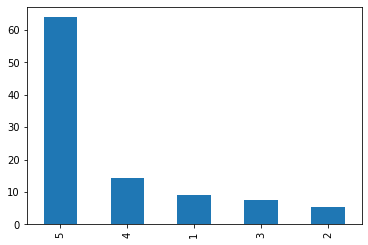

In [ ]:
round(reviews.Score.value_counts(normalize=True)*100,2).plot(kind='bar')

In [ ]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Step2 - Data preprocessing

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX



In [ ]:
#Removinmg columns
reviews.drop(columns=['Id','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'], inplace=True)

In [ ]:
reviews.head(), reviews.shape

(    ProductId  Score                                               Text
 0  B001E4KFG0      5  I have bought several of the Vitality canned d...
 1  B00813GRG4      1  Product arrived labeled as Jumbo Salted Peanut...
 2  B000LQOCH0      4  This is a confection that has been around a fe...
 3  B000UA0QIQ      2  If you are looking for the secret ingredient i...
 4  B006K2ZZ7K      5  Great taffy at a great price.  There was a wid...,
 (568454, 3))

In [ ]:
stop_words = stopwords.words('english') 
stop_words.append('br')
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
#------------------------------------------------------------------#
###Generic function takes a review and perform all pre-processing
#------------------------------------------------------------------#
def normalize_sent_corpus(text):
  # first tokenoze
  sent_document_list = word_tokenize(text)  
  l = [wordnet_lemmatizer.lemmatize(s.lower()) for s in sent_document_list if s.isalpha() and s not in stop_words]

  return ' '.join(l) 

In [ ]:
# testing the normalize method
str1 = "Hello. 'Lots' of twizzlers##$ [], just: what you expect123: https://lets. check123 123. This is vinay 123"
str2= "I bought these for my husband. He loves these, and apparently his staff likes them also<br />well worth the price. <a href=""http://www.amazon.com/gp/product/B001GVISJM"">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>"
str3 = "This movie in not good. One of the thing I do not like, though, is McCann's use of thickeners."
str4 = "B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World, flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"
str5="Pizza's hut!!"
normalize_sent_corpus(str5)  

'pizza hut'

In [ ]:
reviews = reviews[0:500]

In [ ]:
reviews.shape

(500, 3)

In [ ]:
reviews.head()

,ProductId,Score,Text
0,B001E4KFG0,5,I have bought several of the Vitality canned d...
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,4,This is a confection that has been around a fe...
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...


In [ ]:
preprocessed = lambda x: normalize_sent_corpus(x)

In [ ]:
reviews['Processed_Text'] = pd.DataFrame(reviews.Text.apply(preprocessed))

In [ ]:
reviews.head()

,ProductId,Score,Text,Processed_Text
0,B001E4KFG0,5,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,B000LQOCH0,4,This is a confection that has been around a fe...,this confection around century it light pillow...
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...,if looking secret ingredient robitussin i beli...
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...,great taffy great price there wide assortment ...


### Step3 - Data vectorization

XXXXXXXXXXXXXXXXXXXXXXXXXX


In [ ]:
review_corpus = reviews['Processed_Text'].tolist()
review_corpus[0:2]

['i bought several vitality canned dog food product found good quality the product look like stew processed meat smell better my labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanut peanut actually small sized unsalted not sure error vendor intended represent product jumbo']

In [ ]:
cv = CountVectorizer(analyzer='word', stop_words='english')
# convert the corpus into matrix
X = cv.fit_transform(review_corpus)
#retrieve the terms found in the corpora
tokens = cv.get_feature_names()
#Get Document Term Matrix
CV_DTM = pd.DataFrame(X.toarray(), columns= tokens)
CV_DTM.head()

,abby,abdominal,able,absence,absolute,absolutely,absorbs,abt,acai,accept,accompaniment,according,account,accumulated,acid,act,activate,active,activity,actual,actually,add,added,addict,addicted,addicting,addiction,addictive,adding,addition,additionally,additive,addled,adjustment,admit,admittedly,adopted,adores,advertised,advertising,...,worst,worth,wou,wow,wrap,wrapped,write,writing,wrong,wrote,wu,wuss,xi,ya,yawning,yay,yeah,year,yelling,yerba,yes,yi,yike,yoga,yogurt,york,young,younger,youngest,yr,yucky,yum,yummy,zack,zen,zero,zest,zing,zip,ît
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
tfidf_vectorizer=TfidfVectorizer(analyzer='word', stop_words='english', ngram_rangle(1,1)) 
#Learn vocabulary and idf, return document-term matrix.
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(review_corpus)

In [ ]:
tfidf_tokens = tfidf_vectorizer.get_feature_names()

TDIDF_DTM = pd.DataFrame(data = tfidf_vectorizer_vectors.toarray(),columns = tfidf_tokens)
TDIDF_DTM.shape

(500, 3167)

In [ ]:
TDIDF_DTM.head()

,abby,abdominal,able,absence,absolute,absolutely,absorbs,abt,acai,accept,accompaniment,according,account,accumulated,acid,act,activate,active,activity,actual,actually,add,added,addict,addicted,addicting,addiction,addictive,adding,addition,additionally,additive,addled,adjustment,admit,admittedly,adopted,adores,advertised,advertising,...,worst,worth,wou,wow,wrap,wrapped,write,writing,wrong,wrote,wu,wuss,xi,ya,yawning,yay,yeah,year,yelling,yerba,yes,yi,yike,yoga,yogurt,york,young,younger,youngest,yr,yucky,yum,yummy,zack,zen,zero,zest,zing,zip,ît
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124296,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210035,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step4 - Sentiment labels

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [ ]:
reviews.head()

,ProductId,Score,Text,Processed_Text
0,B001E4KFG0,5,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,B000LQOCH0,4,This is a confection that has been around a fe...,this confection around century it light pillow...
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...,if looking secret ingredient robitussin i beli...
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...,great taffy great price there wide assortment ...


In [ ]:
reviews['sentiment_flag'] = reviews['Score'].apply(lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral')

In [ ]:
reviews = reviews.drop(columns='Text')
reviews.head()

,ProductId,Score,Processed_Text,sentiment_flag
0,B001E4KFG0,5,i bought several vitality canned dog food prod...,positive
1,B00813GRG4,1,product arrived labeled jumbo salted peanut pe...,negative
2,B000LQOCH0,4,this confection around century it light pillow...,positive
3,B000UA0QIQ,2,if looking secret ingredient robitussin i beli...,negative
4,B006K2ZZ7K,5,great taffy great price there wide assortment ...,positive


In [ ]:
#stats
reviews.sentiment_flag.value_counts()

positive    409
negative     54
neutral      37
Name: sentiment_flag, dtype: int64

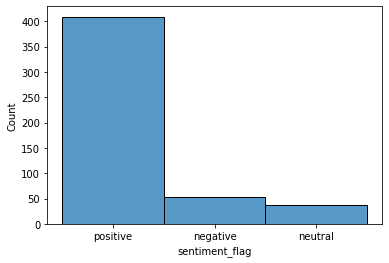

In [ ]:
ax = sns.histplot(reviews, x='sentiment_flag')

### Step5 - Topic Analysis

LDA


In [ ]:
#import module for LDA
from gensim import models, matutils
import scipy.sparse


In [ ]:
#TDM to gensim format
sparse_counts = scipy.sparse.csr_matrix(CV_DTM.transpose())
corpus = matutils.Sparse2Corpus(sparse_counts)

id2word = dict((v,k) for k, v in cv.vocabulary_.items())

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=100)
lda.print_topics()

[(0,
  '0.018*"chip" + 0.016*"food" + 0.013*"tea" + 0.008*"like" + 0.007*"taste" + 0.007*"love" + 0.007*"dog" + 0.007*"cat" + 0.006*"flavor" + 0.006*"kettle"'),
 (1,
  '0.013*"like" + 0.013*"good" + 0.013*"flavor" + 0.012*"great" + 0.011*"product" + 0.011*"taste" + 0.008*"sugar" + 0.008*"love" + 0.007*"bag" + 0.007*"chip"')]

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=100)
lda.print_topics()

[(0,
  '0.019*"chip" + 0.014*"like" + 0.014*"taste" + 0.013*"love" + 0.013*"good" + 0.013*"flavor" + 0.011*"great" + 0.010*"bag" + 0.009*"product" + 0.009*"tea"'),
 (1,
  '0.010*"flavor" + 0.009*"chip" + 0.009*"sugar" + 0.008*"brand" + 0.008*"great" + 0.008*"oatmeal" + 0.007*"good" + 0.006*"taste" + 0.006*"like" + 0.006*"product"'),
 (2,
  '0.027*"food" + 0.012*"dog" + 0.012*"cat" + 0.010*"coffee" + 0.007*"like" + 0.006*"year" + 0.005*"tried" + 0.005*"good" + 0.004*"product" + 0.004*"creamer"')]

Identify topics for each label (positive versus negative or sentiment score). Visualize topics as word clouds or bar graphs.

### Step6 - Split data 

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [ ]:
reviews.head()

,ProductId,Score,Processed_Text,sentiment_flag
0,B001E4KFG0,5,i bought several vitality canned dog food prod...,positive
1,B00813GRG4,1,product arrived labeled jumbo salted peanut pe...,negative
2,B000LQOCH0,4,this confection around century it light pillow...,positive
3,B000UA0QIQ,2,if looking secret ingredient robitussin i beli...,negative
4,B006K2ZZ7K,5,great taffy great price there wide assortment ...,positive


In [ ]:
#Split into training and testing models. 
from sklearn.model_selection import train_test_split
X=reviews["Processed_Text"]
y=reviews["sentiment_flag"]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,shuffle=False)

In [ ]:
#Get shape of training and testing models
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(400,) (100,) (400,) (100,)


### Step7 - Sentiment analysis

#**Model**


###SVM

**Support vector machine** We have created model using TF-IDF. For each iteration a plot showing F1-Score vs. alpha was created and the best HyperParameter was found. Finally, for each iteration: Accuracy, Precision, Recall and F1-Score were displayed along with a confusion matrix.

In [ ]:
from sklearn.linear_model import SGDClassifier

#Fit SVM, TF-IDF Model
LR = SGDClassifier(loss = 'hinge', class_weight='balanced', learning_rate='optimal',eta0=0.001, n_jobs = -1)
a_val = [0.0000001,0.0000005,0.000001,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
param = [{'alpha': a_val}]

gsv = GridSearchCV(LR,param,cv=5,verbose=1,scoring='accuracy', cv=5, n_jobs=-1, verbose=verbose)
gsv.fit(X_train_tfidf,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_alpha=gsv.best_params_['alpha']

#Visualize F-Score and alpha
x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)
plt.xlabel("F1-Score",fontsize=15)
plt.ylabel("F1-Score")
plt.title('F1-Score v/s alpha')
plt.plot(a_val,x,linestyle='dashed', marker='x', markerfacecolor='red', markersize=13)
plt.show()

SyntaxError: ignored

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Fit a Logistic Regression model using TF-IDF
LR = LogisticRegression(penalty='l1', solver='liblinear')
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
C_value = [{'C': C}]

gsv = GridSearchCV(LR,C_value,cv=5,verbose=1,scoring='accuracy')
gsv.fit(X_train_tfidf,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_C=gsv.best_params_['C']

#Visualize F-Score and C
x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)
plt.xlabel("F1-Score",fontsize=15)
plt.ylabel("F1-Score")
plt.title('F1-Score v/s alpha')
plt.plot(C,x,linestyle='dashed', marker='x', markerfacecolor='red', markersize=10)
plt.show()

In [ ]:
#Get accuracy, precision, recall, and F1-Score
LR= LogisticRegression(penalty='l1',C=100, solver='liblinear')
LR.fit(X_train_tfidf,y_train)
y_pred =LR.predict(x_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))

#Create Confusion Matrix
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)

###Naive Bayes,TF-IDF

In [ ]:
# library for modeling 
from sklearn.naive_bayes import MultinomialNB
#  library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = tf_idf_vect.fit_transform(X_train)
X_test_tfidf = tf_idf_vect.transform(X_test)



#Fit a Naïve Bayes TF-IDF
NB = MultinomialNB()
alpha=[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
alpha_value = {'alpha':alpha} #params we need to try on classifier
gsv = GridSearchCV(NB,alpha_value,cv=5,verbose=1,scoring='accuracy')
gsv.fit(X_train_tfidf,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_alpha=gsv.best_params_['alpha']

#Visualize F-score vs Alpha
x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel("F1-Score")
plt.title(r'F1-Score v/s $\alpha$')
plt.plot(alpha,x,linestyle='dashed', marker='x', markerfacecolor='red', markersize=10)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
#Get accuracy, precision, recall, and F1-Score
NB = MultinomialNB(0.1)
NB.fit(X_train_tfidf,y_train)
y_pred = NB.predict(X_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='weighted')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='weighted')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='weighted')))

#Create confusion matrix
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)

### Step8 - Evaluation

Provide accuracy score, confusion metrics for each analysis (SVM, Regression, NB). You can also try the regularization or tweaking  models parameters


In [ ]:
# evaluation of model 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

### Step9 - Conclusion 

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


### Step10 - Refrences

**Code**

<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


Smith, J. 2011. GraphicsDrawer source code (Version 2.0) [Source code]. Available from http://www.graphicsdrawer.com (Links to an external site.)

Website with no date

National Alliance on Mental Illness. (n.d.). Mental health conditions .  https://www.nami.org/Learn-More/Mental-Health-Conditions
